## Observations and Insights 

In [171]:
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results=pd.merge(mouse_metadata, study_results, on= "Mouse ID")
# Display the data table for preview
mouse_results.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [172]:
# Checking the number of mice.
mouse_count=len(mouse_results["Mouse ID"].unique())
mouse_count

249

In [173]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=mouse_results.loc[mouse_results.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [174]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse=mouse_results.loc[mouse_results["Mouse ID"] =='g989', :]
duplicate_mouse


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [175]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse=mouse_results[mouse_results["Mouse ID"] == "g989"].index
mouse_results.drop(mouse_results[mouse_results["Mouse ID"] == "g989"].index, inplace=True)
mouse_results.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [176]:
# Checking the number of mice in the clean DataFrame.
final_mouse_count=len(mouse_results["Mouse ID"].unique())
final_mouse_count

248

## Summary Statistics

In [177]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_df=mouse_results[["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

tumor_group=tumor_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean=tumor_group.mean()
tumor_mean=tumor_mean["Tumor Volume (mm3)"]
tumor_median=tumor_group.median()
tumor_median=tumor_median["Tumor Volume (mm3)"]
tumor_variance=tumor_group.var()
tumor_variance=tumor_variance["Tumor Volume (mm3)"]
tumor_std=tumor_group.std()
tumor_std=tumor_std["Tumor Volume (mm3)"]
tumor_sem=tumor_group.sem()
tumor_sem=tumor_sem["Tumor Volume (mm3)"]
tumor_total=tumor_group.count()
tumor_total=tumor_total["Tumor Volume (mm3)"]
# Assemble the resulting series into a single summary dataframe.
summary_stats=pd.DataFrame({"Total Count": tumor_total,
                            "Mean Tumor Volume": tumor_mean,
                            "Median Tumor Volume": tumor_median,
                            "Tumor Volume Variance": tumor_variance,
                            "Tumor Volume Std. Dev.": tumor_std,
                            "Tumor Volume Std. Err.": tumor_sem})
summary_stats


Total Count  Mean Tumor Volume  Median Tumor Volume  \
Drug Regimen                                                        
Capomulin             230          40.675741            41.557809   
Ceftamin              178          52.591172            51.776157   
Infubinol             178          52.884795            51.820584   
Ketapril              188          55.235638            53.698743   
Naftisol              186          54.331565            52.509285   
Placebo               181          54.033581            52.288934   
Propriva              148          52.320930            50.446266   
Ramicane              228          40.216745            40.673236   
Stelasyn              181          54.233149            52.431737   
Zoniferol             182          53.236507            51.818479   

              Tumor Volume Variance  Tumor Volume Std. Dev.  \
Drug Regimen                                                  
Capomulin                 24.947764                4.994774   
Ceftamin                  39.290177                6.268188   
Infubinol                 43.128684                6.567243   
Ketapril                  68.553577                8.279709   
Naftisol                  66.173479                8.134708   
Placebo                   61.168083                7.821003   
Propriva                  43.852013                6.622085   
Ramicane                  23.486704                4.846308   
Stelasyn                  59.450562                7.710419   
Zoniferol                 48.533355                6.966589   

              Tumor Volume Std. Err.  
Drug Regimen                          
Capomulin                   0.329346  
Ceftamin                    0.469821  
Infubinol                   0.492236  
Ketapril                    0.603860  
Naftisol                    0.596466  
Placebo                     0.581331  
Propriva                    0.544332  
Ramicane                    0.320955  
Stelasyn                    0.573111  
Zoniferol                   0.516398

In [178]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<IPython.core.display.Javascript object>


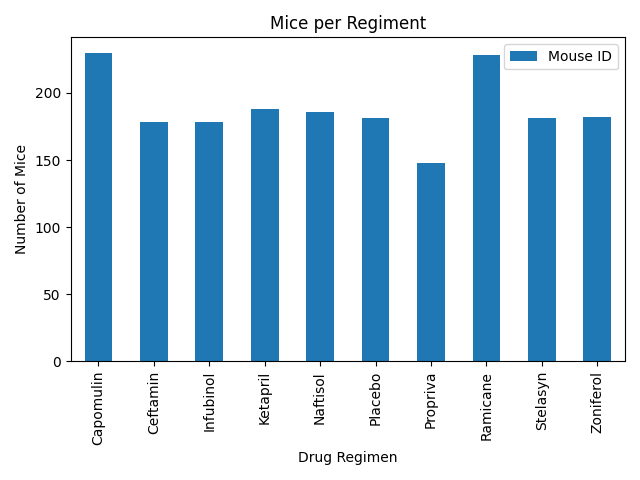

In [180]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
graph_data=mouse_results[["Mouse ID", "Drug Regimen"]]
graph_grp=graph_data.groupby("Drug Regimen")
regimen_count=graph_grp.count()
regimen_count
regimen_chart=regimen_count.plot(kind="bar", title="Mice per Regiment")
regimen_chart.set_xlabel("Drug Regimen")
regimen_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()

In [167]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.


In [187]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data=mouse_results[["Mouse ID", "Sex"]]
gender_grp=gender_data.groupby("Sex")
# gender_count=gender_grp.count()
# gender_count

gender_pie=gender_count(kind="pie", y="Mouse ID", title=("Mice by Sex"))
gender_pit.set_ylabel("Sex")

plt.show()
plt.axis("equal")

TypeError: 'DataFrame' object is not callable

        Mouse ID
Sex             
Female       922
Male         958


<IPython.core.display.Javascript object>


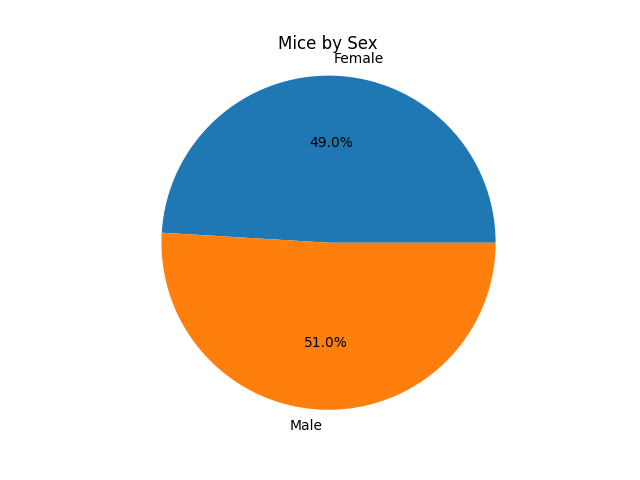

<function matplotlib.pyplot.show(block=None)>

In [186]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data=mouse_results[["Mouse ID", "Sex"]]
gender_grp=gender_data.groupby("Sex")
gender_count=gender_grp.count()
gender_count
print(gender_count)
count=[922, 958]
labels="Female", "Male"
plt.pie(count, labels=labels, autopct='%1.1f%%')
plt.title("Mice by Sex")
plt.axis('equal')
plt.show


## Quartiles, Outliers and Boxplots

In [204]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_df
tumor_group=tumor_df.groupby(["Drug Regimen"])
tumor_count=tumor_group.sum()
tumor_count.head(15)
tumor_count.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
tumor_count.head(15)
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Tumor Volume (mm3)
Drug Regimen                    
Capomulin            9355.420462
Ceftamin             9361.228582
Infubinol            9413.493529
Ketapril            10384.299876
Naftisol            10105.671026
Placebo              9780.078122
Propriva             7743.497619
Ramicane             9169.417875
Stelasyn             9816.199991
Zoniferol            9689.044192

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
